The solution is  15*sin(5*t)/122 - 9*cos(5*t)/61 + 187*sqrt(3)*exp(-t)*sin(2*sqrt(3)*t)/732 + 70*exp(-t)*cos(2*sqrt(3)*t)/61


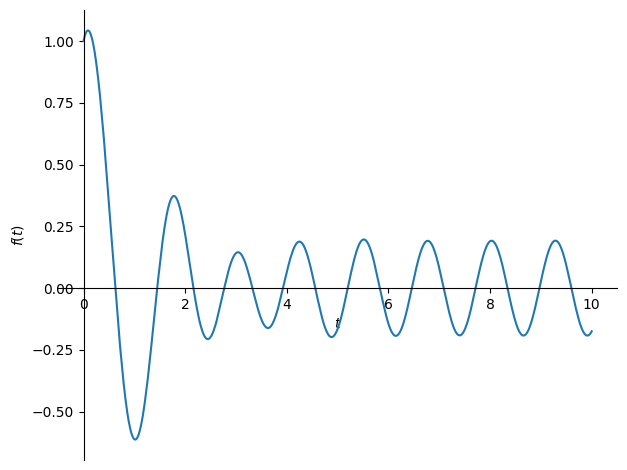

The solution is  (187*sqrt(3)*sin(2*sqrt(3)*t)/732 + 70*cos(2*sqrt(3)*t)/61)*exp(-t) + 15*sin(5*t)/122 - 9*cos(5*t)/61


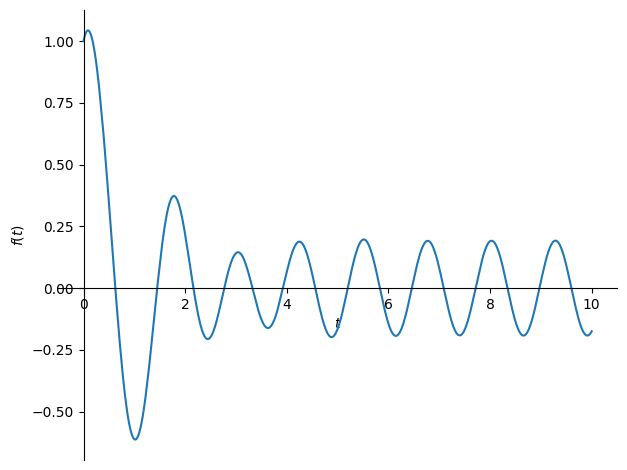

In [5]:
from sympy import *
t = symbols('t', positive=True) # define variable t
s = symbols('s')
y = Function('y') # define function y(t)
#deq = y(t).diff(t,2)+2*y(t).diff(t,1)+10*y(t)-2*sin(3*t) # differential equation
deq = y(t).diff(t,2) + 2*y(t).diff(t,1) + 13*y(t) - 3*cos(5*t)

L_deq = laplace_transform(deq,t,s,noconds=True) # take the Laplace transform of the differential equ

L_y = laplace_transform(y(t),t,s, noconds=True) # define L_y = L{y(t)}
Y = symbols('Y') # introduce symbol Y = L_y
L_deq_1 = L_deq.subs(L_y, Y) # substitute Y for L{y(t)}

#ics = {y(0):1, y(t).diff(t,1).subs(t,0):0} # define initial conditions
ics = {y(0):1, y(t).diff(t,1).subs(t,0):1} # define initial conditions


L_deq_2 = L_deq_1.subs(ics) # plug in initial conditions
Y_soln = solve(L_deq_2,Y) # solve for Y_sol = Y(s) = L{y(t)}
y_soln = inverse_laplace_transform(Y_soln[0], s, t) # find the inverse Laplace transform
print('The solution is ', y_soln)
plot(y_soln, (t,0,10))

# Let us verify the solution above
y_soln_1 = dsolve(deq, y(t), ics=ics)
print('The solution is ', y_soln_1.rhs)
#The solution is (43*sin(3*t)/111 + 49*cos(3*t)/37)*exp(-t) + 2*sin(3*t)/37 - 12*cos(3*t)/37
plot(y_soln_1.rhs, (t,0,10))

